In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
import seaborn as sns 
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from itertools import islice
from scipy.stats import rv_discrete
import requests
from io import BytesIO
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from zipfile import ZipFile
from collections import Counter

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"

with ZipFile(BytesIO(requests.get(url).content), "r") as myzip:

    with myzip.open("DryBeanDataset/Dry_Bean_Dataset.xlsx", "r") as f:
        df = pd.read_excel(f)
       
      

# EDA & PREPROCESSING

In [3]:
print(df.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [4]:
df['Class'] = df['Class'].replace(['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY'],[0,1,2,3,4,5,6])

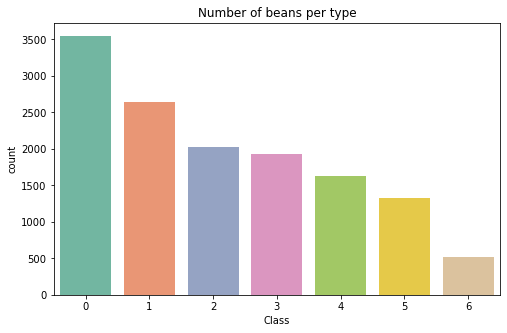

In [5]:
plt.figure(figsize = (8, 5))
sns.countplot(x = df["Class"], palette="Set2")
plt.title("Number of beans per type")
plt.show()

In [6]:
df1 = df.copy()

# SPLITTING THE DATASET BEFORE ANY PREPROCESSING

In [7]:
df_train,df_test = train_test_split(df1, test_size = 0.3)

In [8]:
skew = df_train.skew().to_frame()
skew.columns = ['Skewness']
skew

,Skewness
Area,2.960429
Perimeter,1.634898
MajorAxisLength,1.369542
MinorAxisLength,2.229824
AspectRation,0.571582
Eccentricity,-1.085105
ConvexArea,2.949683
EquivDiameter,1.952734
Extent,-0.888691
Solidity,-2.386923


In [8]:
def histogram_boxplot(feature, figsize=(10,5), bins = None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet')
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(feature, kde=False, ax=ax_hist2) 
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') 

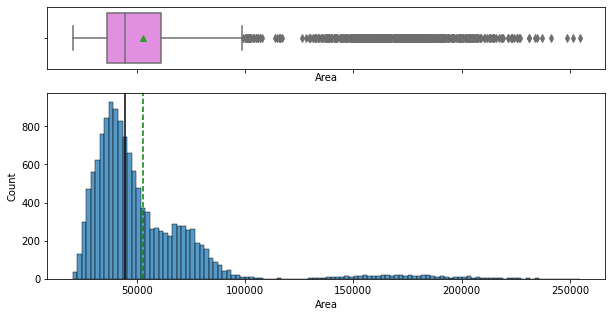

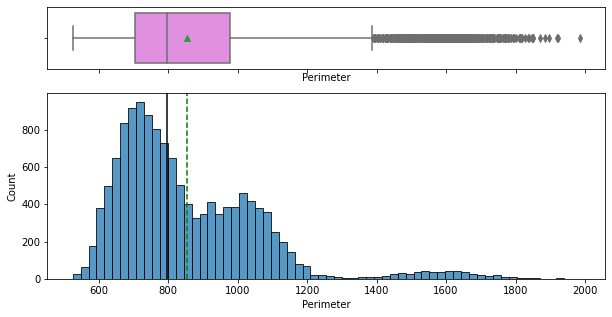

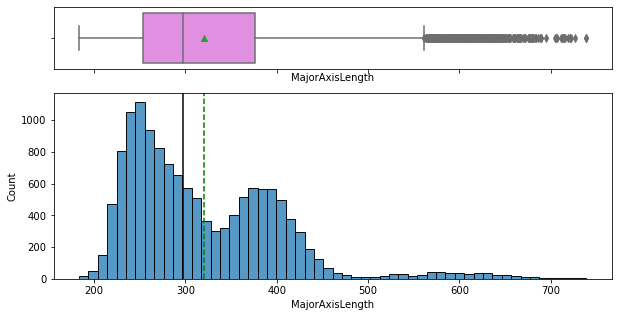

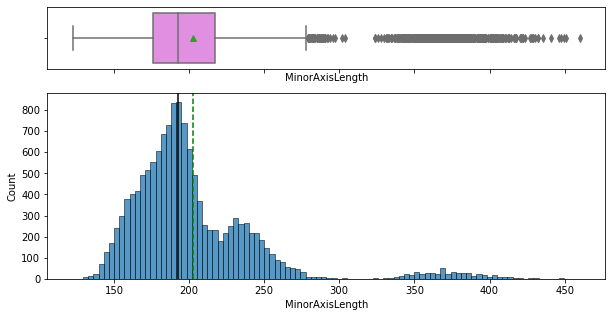

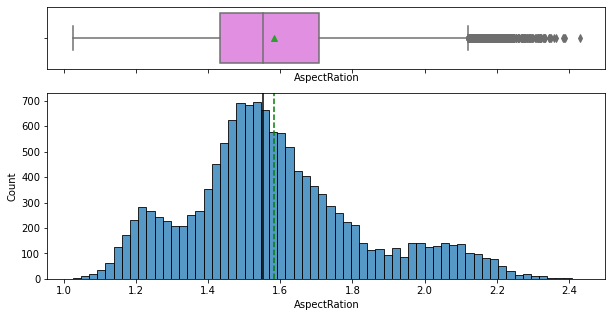

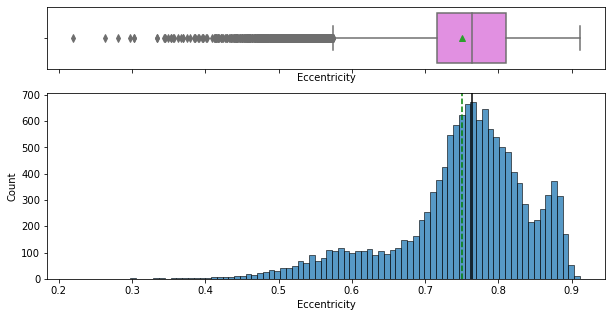

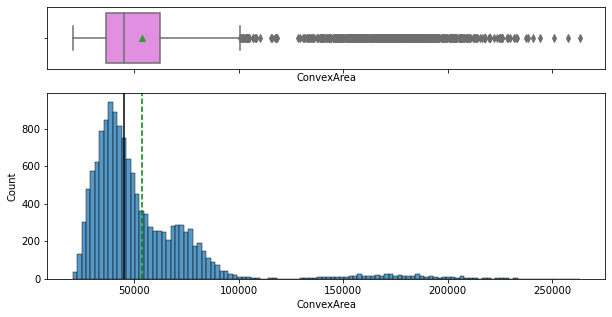

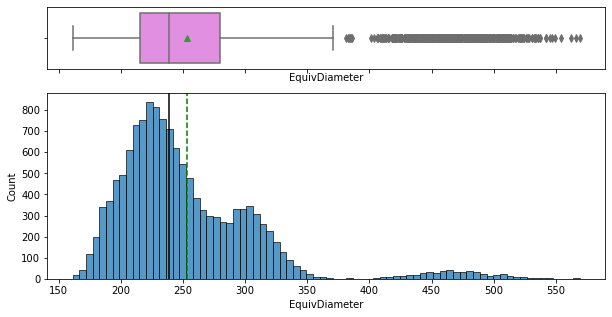

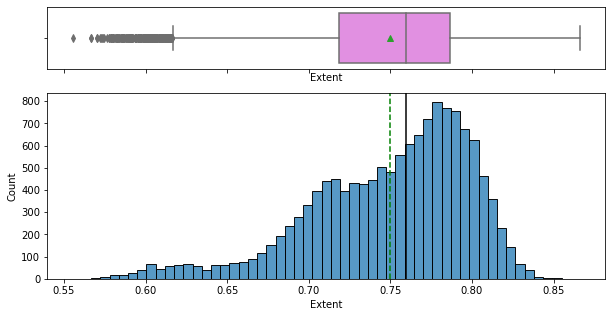

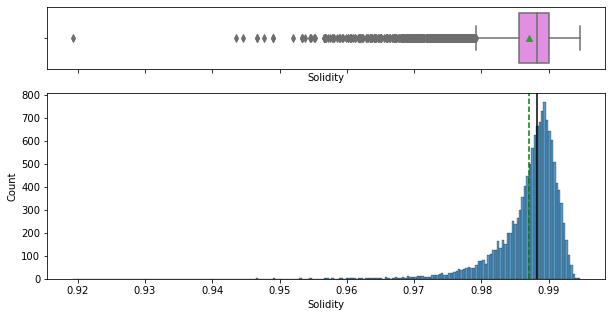

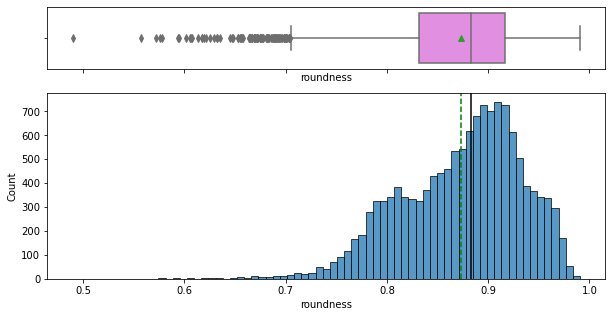

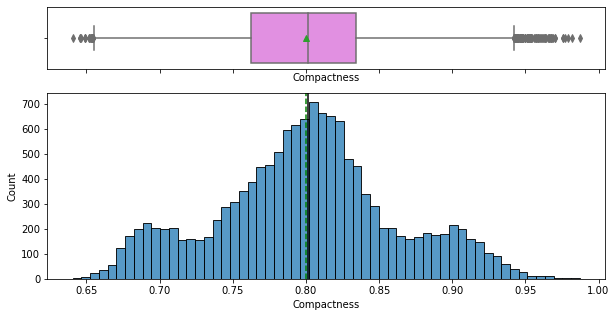

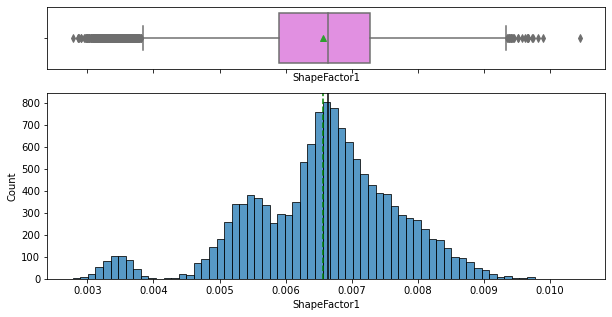

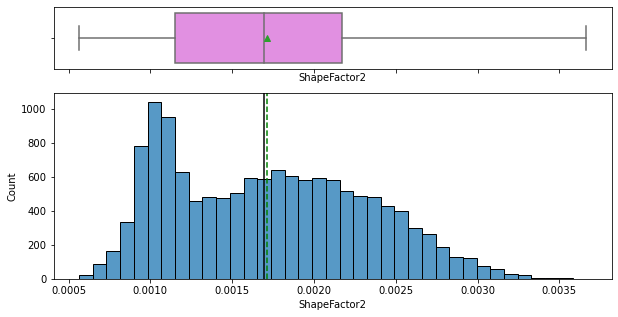

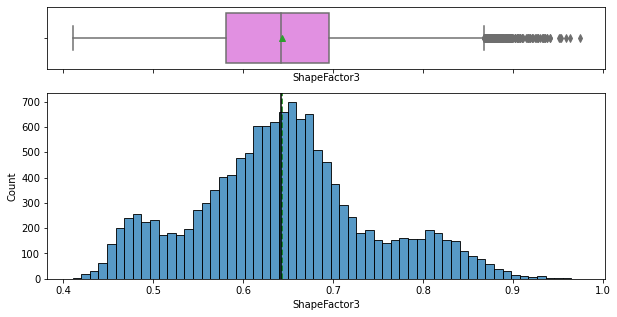

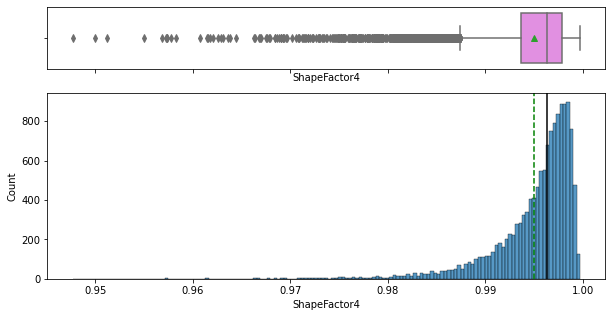

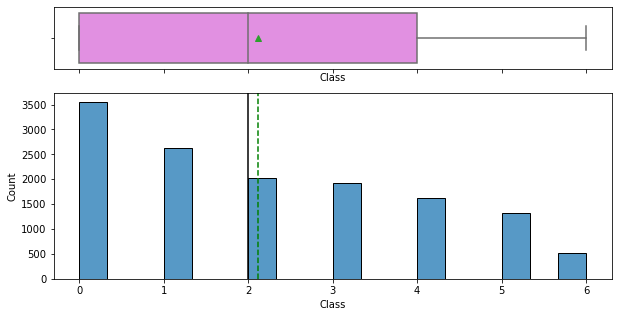

In [31]:
for col in df:
    histogram_boxplot(df[col])

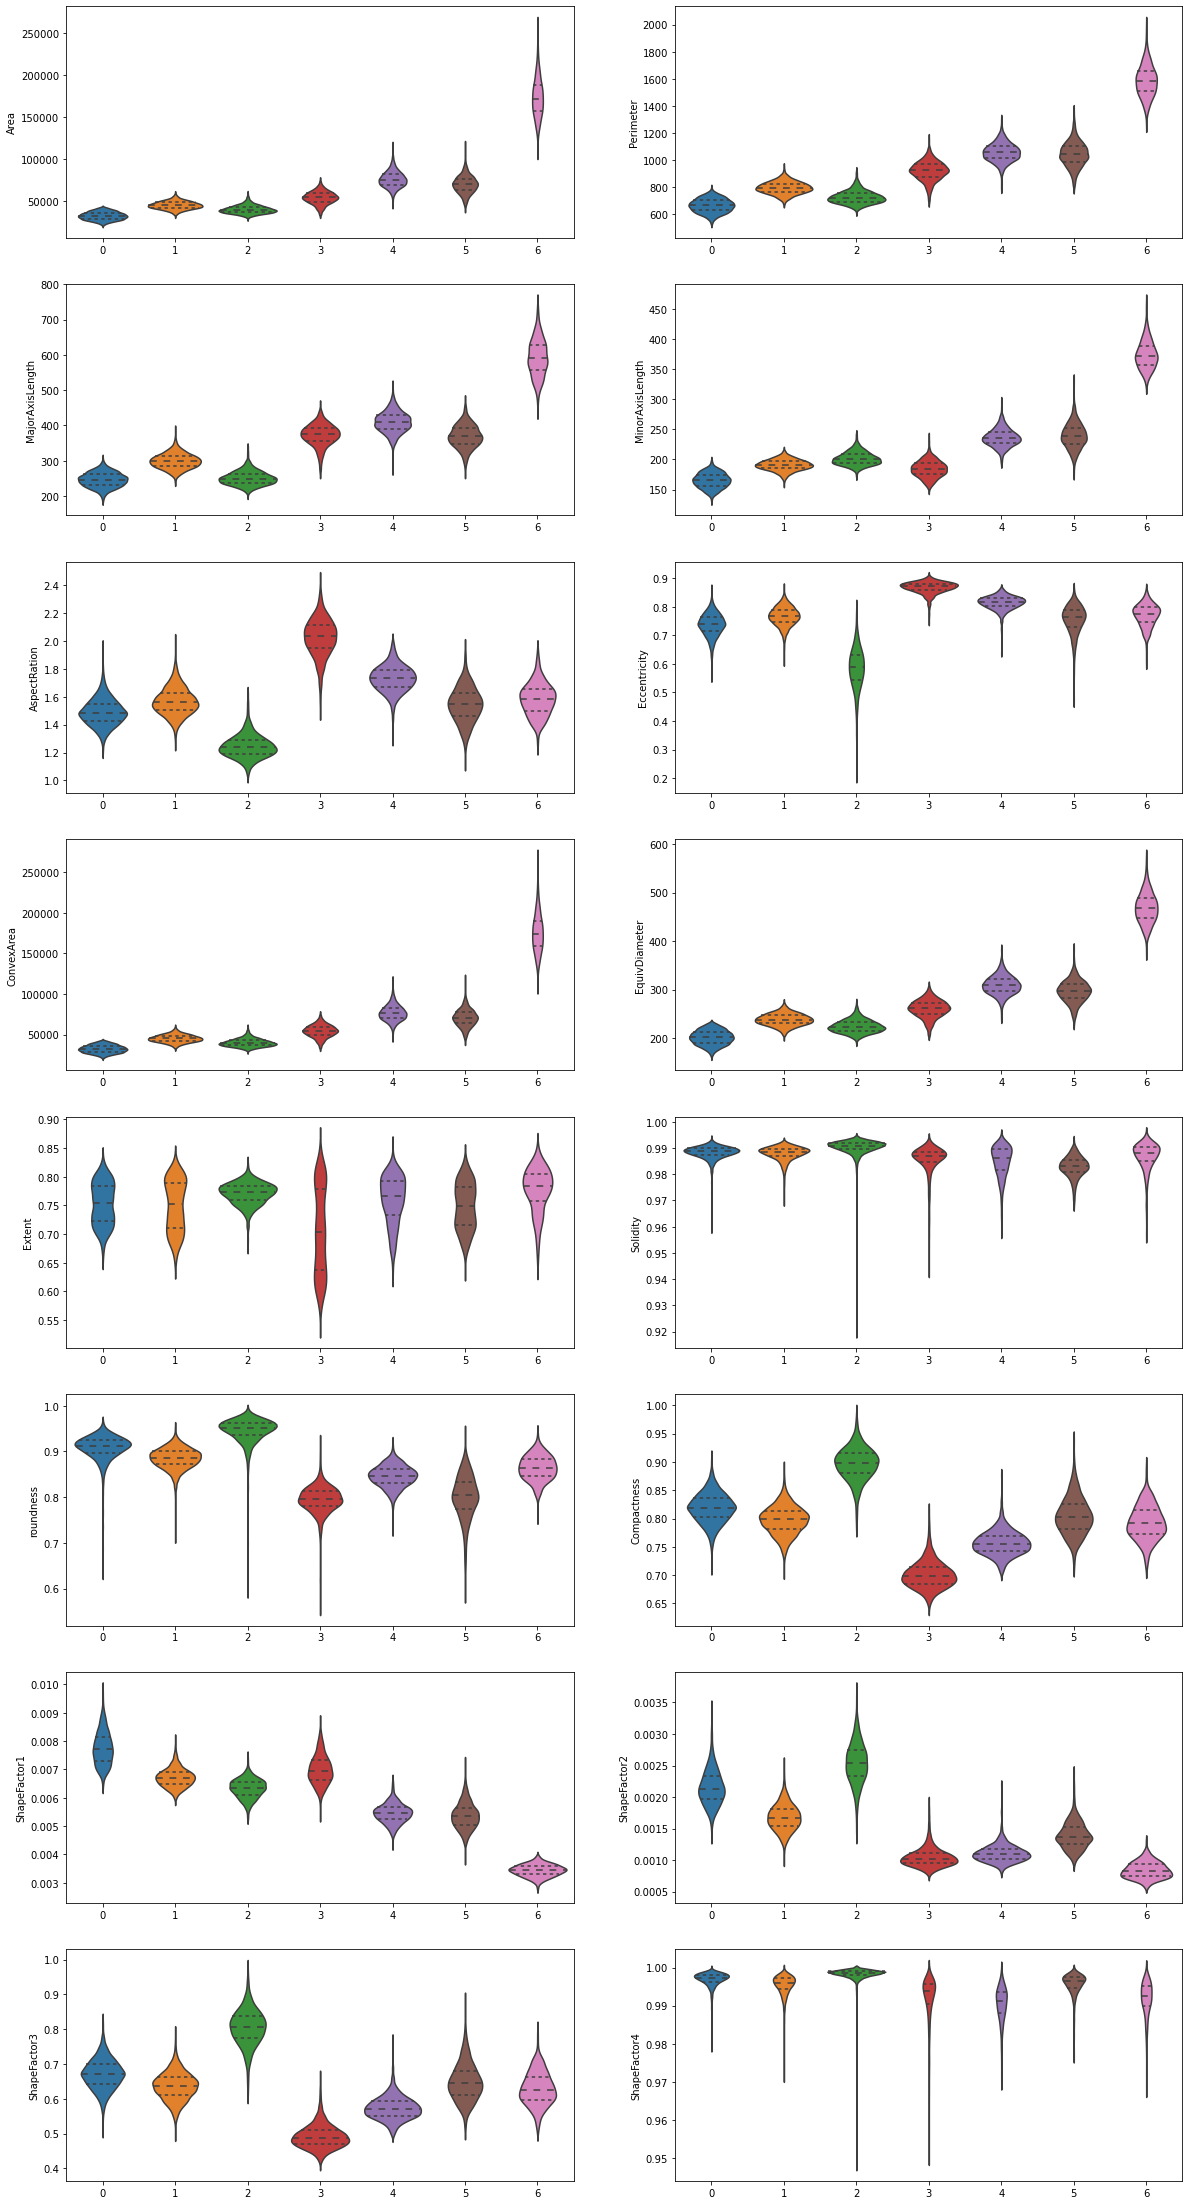

In [15]:
fig, axes = plt.subplots(8, 2, figsize = (20, 40))
for feature, ax in zip(df_train.iloc[:,:-1], axes.flatten()):
    sns.violinplot(data=df_train,
                   x="Class",
                   y=feature,
                   inner="quartile",
                   ax=ax)
    ax.set(xlabel=None)
plt.show()

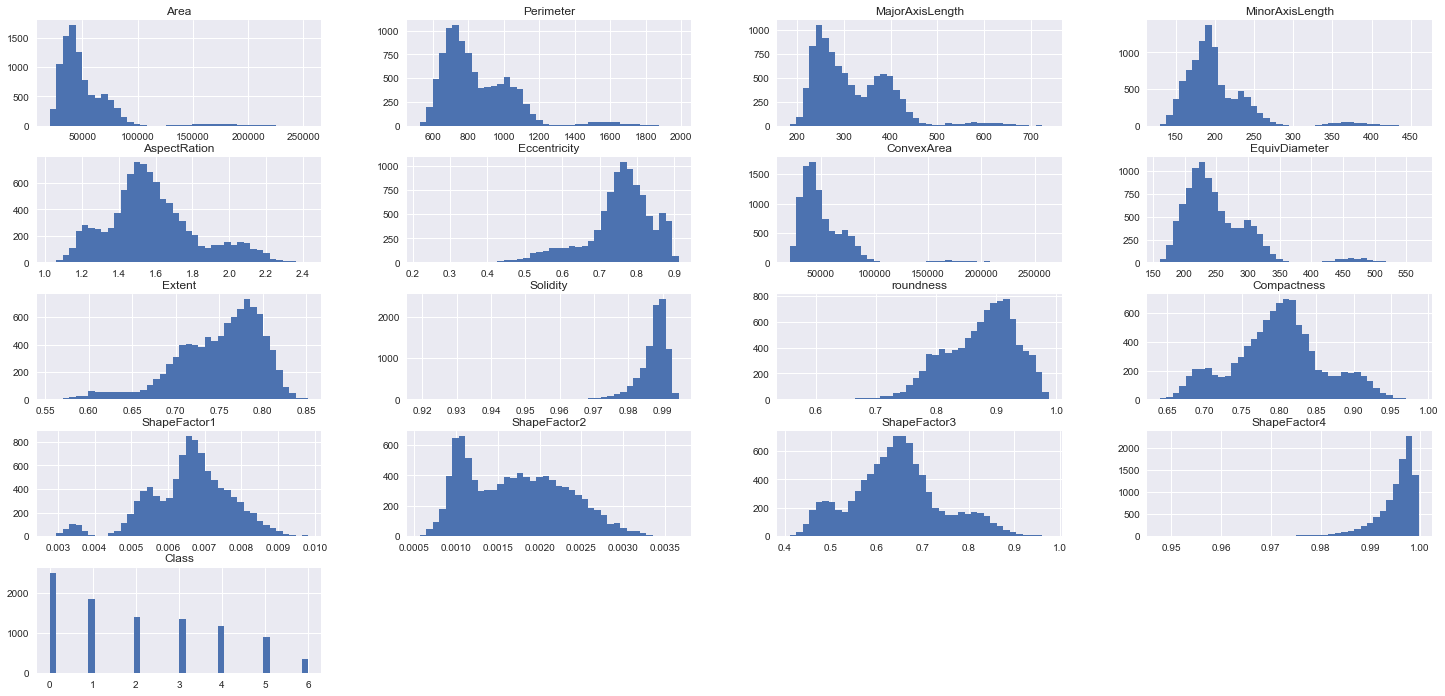

In [16]:
plt.style.use('seaborn')

df_train.hist(bins=40, figsize=(25, 12));

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

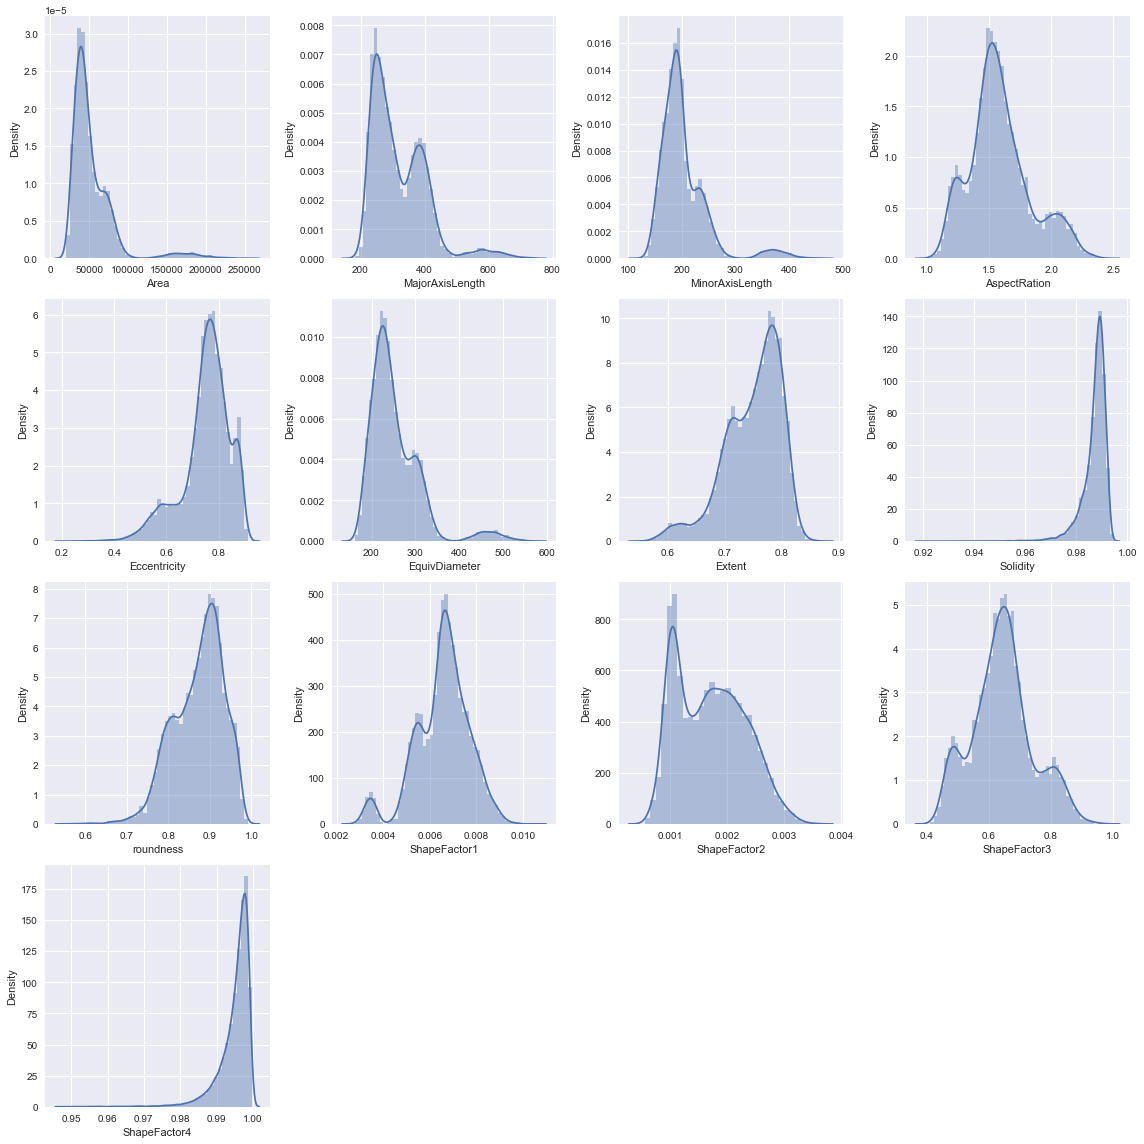

In [19]:
cols = ['Area', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

plt.figure(figsize=(16,16))
for (i,j) in enumerate(cols):
    plt.subplot(4,4,i+1)
    sns.distplot(df_train[j] , kde=True)
    
    
plt.tight_layout()

We see that the most skewed distributions appearing are

1)Solidity 2)ShapeFactor4 3)Area Note There are some other skewed distributions appearing here , 
but after experimenting several times , transforming these were only giving improvements in performance 
We apply transformations to these two columns. 
We'll apply np.log transform For both Solidity and ShapeFactor4 most values are between 0.98 - 1.00 too.
we'll apply log transform to (1 - Solidity), (1 - ShapeFactor4) respectively But for area we will apply normal log transformation

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

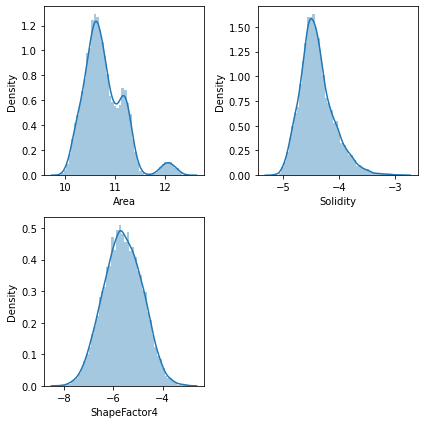

In [36]:
bean_df_train = df_train.copy()
bean_df_train['Solidity'] = np.log(1 - bean_df_train['Solidity'])
bean_df_train['ShapeFactor4'] = np.log(1 - bean_df_train['ShapeFactor4'])
bean_df_train['Area'] = np.log( bean_df_train['Area'])
cols = ['Area','Solidity','ShapeFactor4']

plt.figure(figsize=(6,6))
for (i,j) in enumerate(cols):
    plt.subplot(2,2,i+1)
    sns.distplot(bean_df_train[j] , kde=True)
    
    
plt.tight_layout()

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

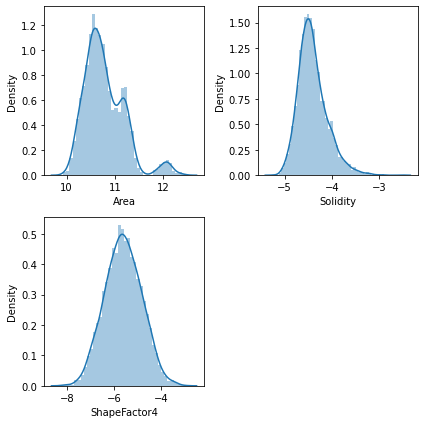

In [37]:
#PERMFORMING THE SAME ON THE TEST SET


bean_df_test = df_test.copy()
bean_df_test['Solidity'] = np.log(1 - bean_df_test['Solidity'])
bean_df_test['ShapeFactor4'] = np.log(1 - bean_df_test['ShapeFactor4'])
bean_df_test['Area'] = np.log( bean_df_test['Area'])
cols = ['Area','Solidity','ShapeFactor4']

plt.figure(figsize=(6,6))
for (i,j) in enumerate(cols):
    plt.subplot(2,2,i+1)
    sns.distplot(bean_df_test[j] , kde=True)
    
    
plt.tight_layout()

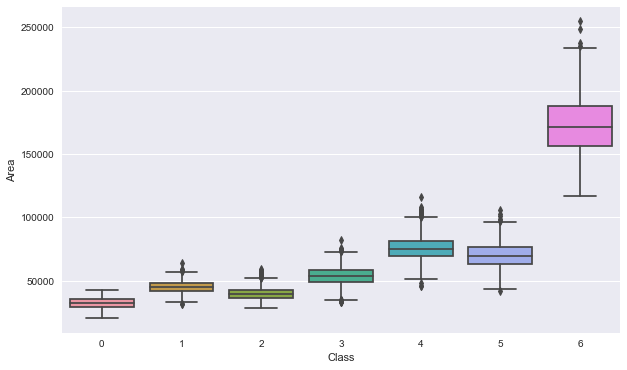

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Area', data=df_train); 

<Figure size 1800x1440 with 0 Axes>

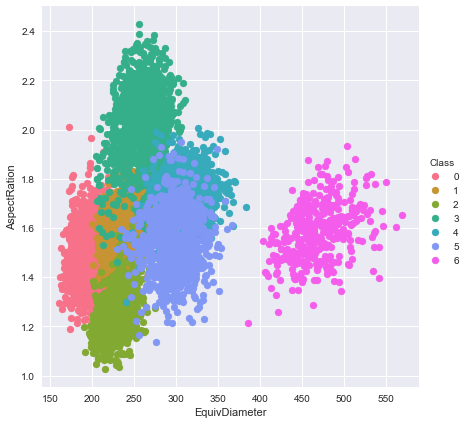

In [22]:
plt.figure(figsize=(25,20))
sns.FacetGrid(df_train, hue ="Class",height = 6).map(plt.scatter,'EquivDiameter','AspectRation').add_legend()

<AxesSubplot:>

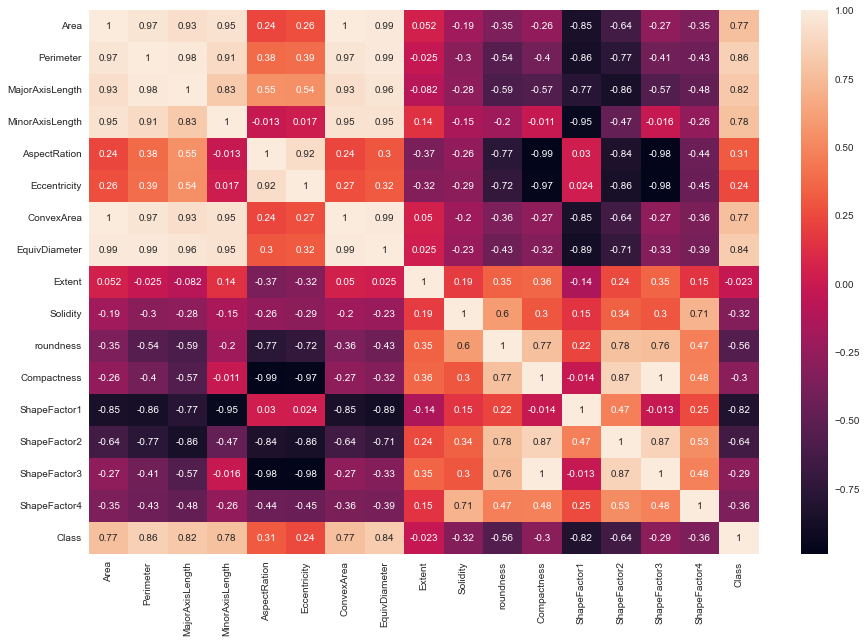

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True)

#####  Perimeter,MajorAxisLength, MinorAxisLength, EquivDiameter, Compactness, ShapeFactor3 are highly correlated and to avoid the problem of Multi Collinearity, we drop them

# MUTUAL INFORMATION

In [32]:
import matplotlib.pyplot as plt 
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
# compares with target variable to select the features 
# higher values represents higher dependency on target variable 
X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1:]
X_train, y_train = train_test_split(df_train, test_size = 0.3)

def select_feature_MI(X_train, y_train):
    
    Sb = SelectKBest(score_func = mutual_info_classif, k = 'all')
    Sb.fit(X_train,y_train)
    X_train = Sb.transform(X_train)
    return X_train, Sb


X_train_selected,  fs = select_feature_MI(X,y)

selected_features_df = pd.DataFrame({'features': list(X.columns), 
                                    'Scores': fs.scores_})
selected_features_df.sort_values(by='Scores', ascending= False)



C:\Users\rahul\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,features,Scores
1,Perimeter,1.062880
6,ConvexArea,1.034914
0,Area,1.031350
7,EquivDiameter,1.030783
2,MajorAxisLength,0.996349
13,ShapeFactor2,0.955056
3,MinorAxisLength,0.930127
12,ShapeFactor1,0.920091
11,Compactness,0.828296
14,ShapeFactor3,0.828280


# ANOVA/F VALUE

In [33]:
def select_feature_f(X_train, y_train):
    
    Sb = SelectKBest(score_func = f_classif, k = 'all')
    Sb.fit(X_train,y_train)
    X_train = Sb.transform(X_train)
    return X_train, Sb


X_train_selected_f, fs_f = select_feature_f(X,y)

selected_features_df = pd.DataFrame({'features': list(X.columns), 
                                    'Scores': fs_f.scores_})
selected_features_df.sort_values(by='Scores', ascending= False)

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,features,Scores
0,Area,20318.876947
6,ConvexArea,20288.894198
7,EquivDiameter,17856.794757
1,Perimeter,17023.633941
3,MinorAxisLength,15835.370334
2,MajorAxisLength,15146.159378
13,ShapeFactor2,8735.359110
12,ShapeFactor1,8462.957581
4,AspectRation,7348.595336
11,Compactness,7186.535088


#####  we can see that "Solidity", "ShapeFactor4", and "Extent" have the lowest scores, which means that they are less likely to depend on the target variable.

#### F-test estimates the degree of linear dependency between two random variables.On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation

In [20]:
import pandas as pd
from sklearn.preprocessing import normalize
normalize = normalize(df)
data_scaled = pd.DataFrame(normalize)
variance = data_scaled.var()
columns = df.columns
variable = []
for i in range(0,len(variance)):
    if variance[i]>= 0.0000000006:
        variable.append(columns[i])
variable

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'ConvexArea',
 'EquivDiameter']

In [89]:
variance

0     2.858513e-06
1     4.552168e-06
2     6.299555e-07
3     4.595615e-07
4     6.178272e-11
5     1.522277e-11
6     2.779932e-06
7     4.799922e-07
8     1.845081e-11
9     3.020481e-11
10    2.950762e-11
11    2.443133e-11
12    2.777726e-15
13    3.342796e-16
14    2.007068e-11
15    3.080112e-11
16    3.318544e-10
dtype: float64

In [38]:
X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1:]
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_model_based = model.transform(X)
X_model_based.shape

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(9527, 13)

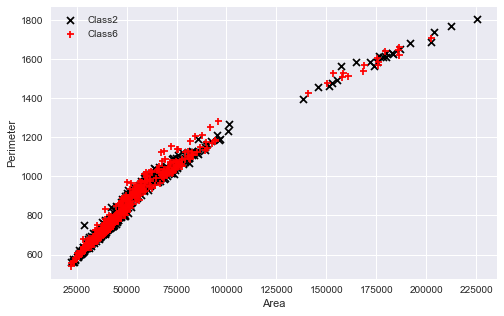

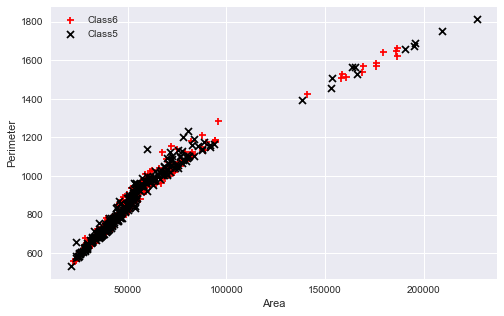

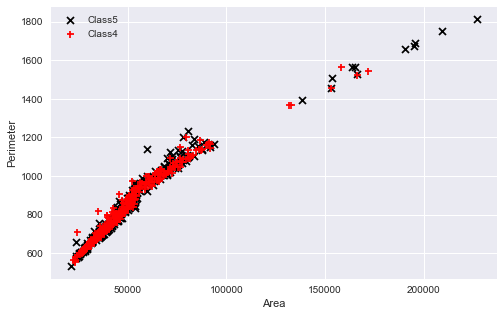

In [34]:

X = df_train.values[:,:-1]
y = df_train.values[:,-1]
plt.figure(figsize = (8, 5))
plt.scatter(X[1500:2027, 0], X[1500:2027, 1], color='black', marker='x', label='Class2')
plt.scatter(X[2027:2500, 0], X[2027:2500, 1], color='red', marker='+', label='Class6')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend(loc='upper left')

plt.show()



X = df_train.values[:,:-1]
y = df_train.values[:,-1]
plt.figure(figsize = (8, 5))
plt.scatter(X[2027:2327, 0], X[2027:2327, 1], color='red', marker='+', label='Class6')
plt.scatter(X[3871:4171, 0], X[3871:4171, 1], color='black', marker='x', label='Class5')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend(loc='upper left')
plt.show()




X = df_train.values[:,:-1]
y = df_train.values[:,-1]
plt.figure(figsize = (8, 5))
plt.scatter(X[3871:4171, 0], X[3871:4171, 1], color='black', marker='x', label='Class5')
plt.scatter(X[5501:5801, 0], X[5501:5801, 1], color='red', marker='+', label='Class4')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend(loc='upper left')
plt.show()

We see that our features exist in a linear subspace

# BASED ON THE ANALYSIS DONE ABOVE WE REMOVE THE FOLLOWING COLUMNS

In [16]:
df_train.drop(['Perimeter','MajorAxisLength','MinorAxisLength','EquivDiameter','Compactness','ShapeFactor3','Eccentricity'], axis=1, inplace=True)
df_test.drop(['Perimeter','MajorAxisLength','MinorAxisLength','EquivDiameter','Compactness','ShapeFactor3','Eccentricity'], axis=1, inplace=True)
bean_df_train.drop(['Perimeter','MajorAxisLength','MinorAxisLength','EquivDiameter','Compactness','ShapeFactor3','Eccentricity'], axis=1, inplace=True)
bean_df_test.drop(['Perimeter','MajorAxisLength','MinorAxisLength','EquivDiameter','Compactness','ShapeFactor3','Eccentricity'], axis=1, inplace=True)

C:\Users\rahul\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### OUTLIER DETECTION

In [137]:
from sklearn.ensemble import IsolationForest
data = df_train.values

iso = IsolationForest(contamination=0.08)
yhat = iso.fit_predict(data)
mask = yhat != -1
data = data[mask, :]
print(data.shape)

(8764, 10)


In [152]:
df_clean_train = pd.DataFrame(data, columns = df_train.columns)
df_6 = df_train[df_train['Class']==6]
df_clean_train = pd.concat([df_clean_train, df_6], axis = 0)
df_clean_train['Class'] = (df_clean_train2['Class']).astype(int)
df_clean_train= df_clean_train.reset_index()
del df_clean_train['index']

In [140]:
for col in df_clean_train.columns:
    df_clean_train = df_clean_train.fillna(df[col].median())

In [114]:
from scipy import stats
df_train_copy = df_train.copy()
df_train_copy = df_train_copy[(np.abs(stats.zscore(df_train_copy)) < 3).all(axis=1)]

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train.drop('Class',axis=1))
scaled_data = scaler.transform(df_train.drop('Class',axis=1))

In [56]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        
    def fit(self,X):
        self.mean = np.mean(X,axis=0)
        X = X-self.mean
        cov = np.cov(X.T)
        eigenvalues,eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        top= eigenvalues[0:self.n_components]
        print(top.sum()/eigenvalues.sum())
        self.components = eigenvectors[0:self.n_components]
    def transform(self,X):
        X = X - self.mean
        print(np.dot(X,self.components.T))
        return np.dot(X,self.components.T)  

In [57]:
pca = PCA(n_components=5)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

0.9699569942723962
[[-2.41843534  0.00977015 -1.13344314  0.57255684 -1.14428765]
 [ 1.43874855 -0.15058438 -1.59988133  0.34273403  0.06958904]
 [-2.68601828  0.29569185 -1.61185963  0.94345855  0.04016742]
 ...
 [-2.96384678 -0.01315742 -2.27021696 -0.35111389  0.62365414]
 [-5.69887613  3.72426112 -6.28404076  1.12589215  0.80313045]
 [ 0.64149944 -0.13375136  0.50694181 -0.86512357  0.04933927]]


WE SEE THAT 97% OF THE VARIANCE IS CAPTURED BY THE MODEL after PCA WITH 5 PRINCIPAL COMPONENTS

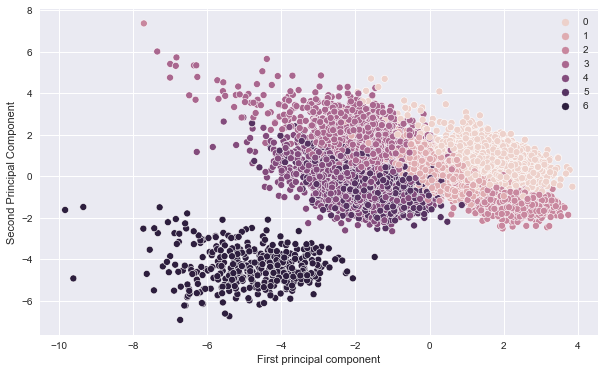

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= x_pca[:,0],y = x_pca[:,1],hue=df_train['Class'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.legend()

In [62]:
Pca_df = pd.DataFrame(x_pca, columns = ['Pc1','Pc2','Pc3','Pc4','Pc5'])
a = df_train['Class'].values
Pca_df = pd.concat([Pca_df, pd.DataFrame(a)], axis=1)

In [63]:
Pca_df

,Pc1,Pc2,Pc3,Pc4,Pc5,0
0,-2.418435,0.009770,-1.133443,0.572557,-1.144288,5
1,1.438749,-0.150584,-1.599881,0.342734,0.069589,0
2,-2.686018,0.295692,-1.611860,0.943459,0.040167,4
3,2.513077,-1.981236,-0.332065,-0.480082,0.167131,2
4,-4.598812,-4.688592,0.325862,-0.103524,-0.024999,6
...,...,...,...,...,...,...
9522,-0.732369,1.246480,-3.322799,-1.189534,-3.496847,2
9523,0.686974,-0.721601,0.509993,0.757180,0.012323,1
9524,-2.963847,-0.013157,-2.270217,-0.351114,0.623654,4
9525,-5.698876,3.724261,-6.284041,1.125892,0.803130,3


# MODELLING - NAIVE BAYES CLASSIFIER

In [179]:
class NaiveBayes:
    
    def __init__(self,df_train, df_test):

        self.df = df
        self.df_train =df_train
        self.df_test = df_test
        
        
    def fit_dist(self,data):
        mu = np.mean(data)
        sigma = np.std(data)
        dist = norm(mu,sigma)
        return dist



    def probability(self,X,prior,distribution):
        self.num_features = self.X_test.shape[1]
        res = []
        for j in range(self.num_features):
            for k,v in distribution.items():
                res.append(v.pdf(X[j]))
        res = res[0::self.num_features+1]
        a = np.prod(res, axis=None, dtype=None, out=None)
        return a*prior

          
          
    def run_model(self):
      
        self.X_train1 = self.df_train.iloc[:,0:-1]
        self.X_test1  = self.df_test.iloc[:,0:-1]
        self.y_train1 = self.df_train.iloc[:,-1]
        self.y_test1  = self.df_test.iloc[:,-1]
    
        self.X_train = self.X_train1.values
        self.X_test = self.X_test1.values
        self.y_train = self.y_train1.values
        self.y_test = self.y_test1.values

        self.num_features = self.X_train.shape[1]

        self.X0_train = self.X_train[self.y_train == 0]
        self.X1_train = self.X_train[self.y_train == 1]
        self.X2_train = self.X_train[self.y_train == 2]
        self.X3_train = self.X_train[self.y_train == 3]
        self.X4_train = self.X_train[self.y_train == 4]
        self.X5_train = self.X_train[self.y_train == 5]
        self.X6_train = self.X_train[self.y_train == 6]

      
        self.prior_y0 = len(self.X0_train) / len(self.X_train)
        self.prior_y1 = len(self.X1_train) / len(self.X_train)
        self.prior_y2 = len(self.X2_train) / len(self.X_train)
        self.prior_y3 = len(self.X3_train) / len(self.X_train)
        self.prior_y4 = len(self.X4_train) / len(self.X_train)
        self.prior_y5 = len(self.X5_train) / len(self.X_train)
        self.prior_y6 = len(self.X6_train) / len(self.X_train)

        self.dist1 = {}
        self.dist2 = {}
        self.dist3 = {}
        self.dist4 = {}
        self.dist5 = {}
        self.dist6 = {}
        self.dist7 = {}

        
        for i in range(self.num_features):
            self.dist1['dist_'+'X'+str(i+1)+'y0'] = self.fit_dist(self.X0_train[:,i])
            self.dist2['dist_'+'X'+str(i+1)+'y1'] = self.fit_dist(self.X1_train[:,i])
            self.dist3['dist_'+'X'+str(i+1)+'y2'] = self.fit_dist(self.X2_train[:,i])
            self.dist4['dist_'+'X'+str(i+1)+'y3'] = self.fit_dist(self.X3_train[:,i])
            self.dist5['dist_'+'X'+str(i+1)+'y4'] = self.fit_dist(self.X4_train[:,i])
            self.dist6['dist_'+'X'+str(i+1)+'y5'] = self.fit_dist(self.X5_train[:,i])
            self.dist7['dist_'+'X'+str(i+1)+'y6'] = self.fit_dist(self.X6_train[:,i])
          


    def predict_test(self):
      
        right = 0
        wrong = 0
        count0 = 0
        count1 = 1
        count2 = 2
        count3 = 3
        count4 = 4
        count5 = 5
        count6 = 6

        
        train_start_time = datetime.now()
        for sample, target in zip(self.X_test, self.y_test):
            
            py0 = self.probability(sample,self.prior_y0,self.dist1)
            py1 = self.probability(sample,self.prior_y1,self.dist2)
            py2 = self.probability(sample,self.prior_y2,self.dist3)
            py3 = self.probability(sample,self.prior_y3,self.dist4)
            py4 = self.probability(sample,self.prior_y4,self.dist5)
            py5 = self.probability(sample,self.prior_y5,self.dist6)
            py6 = self.probability(sample,self.prior_y6,self.dist7)
            
            print('p(y=0 | %s) = %.3f' % (sample, py0*100))
            print('p(y=1 | %s) = %.3f' % (sample, py1*100))
            print('p(y=2 | %s) = %.3f' % (sample, py2*100))
            print('p(y=3 | %s) = %.3f' % (sample, py3*100))
            print('p(y=4 | %s) = %.3f' % (sample, py4*100))
            print('p(y=5 | %s) = %.3f' % (sample, py5*100))
            print('p(y=6 | %s) = %.3f' % (sample, py6*100))
            
            print('model predicted class {} and the truth was {} \n' .format(np.argmax([py0*100,py1*100,py2*100,py3*100,py4*100,py5*100,py6*100]), target))
            if (np.argmax([py0*100,py1*100,py2*100,py3*100,py4*100,py5*100,py6*100]) == target):
                print('Right\n')
                right+=1
            else:
                if target == 0:
                    count0+=1
                elif target ==1:
                    count1+=1
                elif target ==2:
                    count2+=1
                elif target ==3:
                    count3+=1
                elif target ==4:
                    count4+=1
                elif target ==5:
                    count5+=1
                elif target ==6:
                    count6+=1
                print('class being misclassified is',target)
                print('Wrong\n')
                wrong+=1
        train_end_time = datetime.now()
        train_time = train_end_time - train_start_time
        print('testing error :',(((wrong)/(right+wrong))*100))
        print('count for class 0 :', count0)
        print('count for class 1 :', count1)
        print('count for class 2 :', count2)
        print('count for class 3 :', count3)
        print('count for class 4 :', count4)
        print('count for class 5 :', count5)
        print('count for class 6 :', count6)
        print('Test Time', train_time)
        
    def predict_train(self):
      
        right = 0
        wrong = 0
        count0 = 0
        count1 = 1
        count2 = 2
        count3 = 3
        count4 = 4
        count5 = 5
        count6 = 6

        
        test_start_time = datetime.now()
        for sample, target in zip(self.X_train, self.y_train):
           
            py0 = self.probability(sample,self.prior_y0,self.dist1)
            py1 = self.probability(sample,self.prior_y1,self.dist2)
            py2 = self.probability(sample,self.prior_y2,self.dist3)
            py3 = self.probability(sample,self.prior_y3,self.dist4)
            py4 = self.probability(sample,self.prior_y4,self.dist5)
            py5 = self.probability(sample,self.prior_y5,self.dist6)
            py6 = self.probability(sample,self.prior_y6,self.dist7)
            
            print('p(y=0 | %s) = %.3f' % (sample, py0*100))
            print('p(y=1 | %s) = %.3f' % (sample, py1*100))
            print('p(y=2 | %s) = %.3f' % (sample, py2*100))
            print('p(y=3 | %s) = %.3f' % (sample, py3*100))
            print('p(y=4 | %s) = %.3f' % (sample, py4*100))
            print('p(y=5 | %s) = %.3f' % (sample, py5*100))
            print('p(y=6 | %s) = %.3f' % (sample, py6*100))
            
            print('model predicted class {} and the truth was {} \n' .format(np.argmax([py0*100,py1*100,py2*100,py3*100,py4*100,py5*100,py6*100]), target))
            if (np.argmax([py0*100,py1*100,py2*100,py3*100,py4*100,py5*100,py6*100]) == target):
                print('Right\n')
                right+=1
            else:
                if target == 0:
                    count0+=1
                elif target ==1:
                    count1+=1
                elif target ==2:
                    count2+=1
                elif target ==3:
                    count3+=1
                elif target ==4:
                    count4+=1
                elif target ==5:
                    count5+=1
                elif target ==6:
                    count6+=1
                print('class being misclassified is',target)
                print('Wrong\n')
                wrong+=1
        test_end_time = datetime.now()
        test_time = test_end_time - test_start_time
        print('training Error:',(((wrong)/(right+wrong))*100))
        print('count for class 0 :', count0)
        print('count for class 1 :', count1)
        print('count for class 2 :', count2)
        print('count for class 3 :', count3)
        print('count for class 4 :', count4)
        print('count for class 5 :', count5)
        print('count for class 6 :', count6)
        print('Train Time', test_time)
        
        

In [ ]:
from datetime import datetime
nb = NaiveBayes(df_train = bean_df_train, df_test = bean_df_test)
nb.run_model()
nb.predict_test()

In [ ]:
nb.predict_train()

In [74]:
bean_df_test

,Area,AspectRation,ConvexArea,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class
7075,11.006075,2.011238,60865,0.623779,-4.577063,0.810740,0.006544,0.000984,-4.933648,3
2597,11.128865,1.681372,69487,0.750761,-3.920507,0.770386,0.005616,0.001217,-5.682674,5
1275,10.617466,1.155593,41338,0.776302,-4.422962,0.923467,0.006006,0.002767,-6.541907,2
13588,10.642779,1.622237,42560,0.753657,-4.149901,0.854823,0.007032,0.001639,-5.876131,0
8792,10.710120,1.533927,45362,0.788300,-4.403462,0.894894,0.006616,0.001720,-5.478650,1
...,...,...,...,...,...,...,...,...,...,...
10420,10.169384,1.301820,26380,0.782486,-4.517401,0.938908,0.007976,0.002895,-6.555617,0
13503,10.615800,1.325416,41143,0.739410,-4.714012,0.954464,0.006437,0.002256,-6.885853,0
6874,10.964311,2.042870,58521,0.626491,-4.362415,0.789674,0.006723,0.000986,-5.545775,3
13059,10.530575,1.615506,37804,0.681054,-4.651292,0.877345,0.007424,0.001743,-5.712325,0


In [79]:
X_train = bean_df_train.iloc[:,:-1].values
y_train = bean_df_train.iloc[:,-1:].values
X_test  = bean_df_test.iloc[:,:-1].values
y_test  = bean_df_test.iloc[:,-1:].values

from sklearn.naive_bayes import GaussianNB
nv = GaussianNB() # create a classifier
nv.fit(X_train,y_train)
y_pred = nv.predict(X_test) 
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test))

0.7220861900097943


C:\Users\rahul\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# MODELLING - K NEAREST NEIGHBORS

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train.drop('Class',axis=1))
scaled_data = scaler.transform(df1.drop('Class',axis=1))

CHECKING OPTIMAL K VALUE

In [44]:
class KNearestNeighbor:
    
    def __init__(self,X,y):
        
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.y, random_state=0, test_size=0.3)

    def euclidean_dist(self,pointA, pointB):
        distance = np.square(pointA - pointB) # (ai-bi)**2 for every point in the vectors
        distance = np.sum(distance) # adds all values
        distance = np.sqrt(distance) 
        return distance

    def distance_from_all_training(self,test_point):
        dist_array = np.array([])
        for train_point in self.X_train:
            dist = self.euclidean_dist(test_point, train_point)
            dist_array = np.append(dist_array, dist)
      
        return dist_array


    def accuracy(self,y_preds):
        
        count0 = 0
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0
        count5 = 0
        count6 = 0
        total_correct = 0
        for i in range(len(self.y_test)):
                if int(self.y_test[i]) == int(y_preds[i]):
                    total_correct += 1
                else:
                    if self.y_test[i] ==0:
                        count0+=1
                    elif self.y_test[i] ==1:
                        count1+=1
                    elif self.y_test[i] ==2:
                        count2+=1
                    elif self.y_test[i] ==3:
                        count3+=1
                    elif self.y_test[i] ==4:
                        count4+=1
                    elif self.y_test[i] ==5:
                        count5+=1
                    else:
                        count6+=1
                    
                        
                    
        total_wrong = count0+count1+count2+count3+count4+count5+count6
        rate = total_wrong/(total_correct+total_wrong)
        print('misclassification rate',rate)
        return rate
    
        
    def KNNClassifier(self,k):
        predictions = np.array([])
        train_features = self.X_train
        train_target = self.y_train

        test_features = self.X_test
        train_target = train_target.reshape(-1,1)
        for test_point in self.X_test:  
            dist_array = self.distance_from_all_training(test_point).reshape(-1,1)
            neighbors = np.concatenate((dist_array, train_target),axis = 1,) 
            neighbors_sorted = neighbors[neighbors[:, 0].argsort()]  # sorts training points on the basis of distance
            k_neighbors = neighbors_sorted[:k] # selects k-nearest neighbors
            frequency = np.unique(k_neighbors[:, 1], return_counts=True)
            target_class = frequency[0][frequency[1].argmax()] # selects label with highest frequency    
            predictions = np.append(predictions, target_class)
                
        return predictions
    

Model Using K=12

In [177]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1.drop('Class',axis=1))
scaled_data = scaler.transform(df1.drop('Class',axis=1))

In [184]:
class KNearestNeighbor:
    
    def __init__(self,X,y):
        
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.y, random_state=0, test_size=0.3)

    def euclidean_dist(self,pointA, pointB):
        distance = np.square(pointA - pointB) # (ai-bi)**2 for every point in the vectors
        distance = np.sum(distance) # adds all values
        distance = np.sqrt(distance) 
        return distance

    def distance_from_all_training(self,test_point):
        dist_array = np.array([])
        for train_point in self.X_train:
            dist = self.euclidean_dist(test_point, train_point)
            dist_array = np.append(dist_array, dist)
      
        return dist_array


    def distance_from_all_training2(self,k=5):
        dist_array = np.array([])
        for train_point in self.X_train:
            for test_point in self.X_test:
                dist = self.euclidean_dist(test_point, train_point)
            dist_array = np.append(dist_array, dist)
            
        print(dist_array.shape)
        print(dist_array.shape)
        return dist_array

    def accuracy_train(self,y_preds):
        train_end_time = datetime.now()
        count0 = 0
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0
        count5 = 0
        count6 = 0
        total_correct = 0
        for i in range(len(self.y_train)):
                if int(self.y_train[i]) == int(y_preds[i]):
                    total_correct += 1
                else:
                    if self.y_train[i] ==0:
                        count0+=1
                    elif self.y_train[i] ==1:
                        count1+=1
                    elif self.y_train[i] ==2:
                        count2+=1
                    elif self.y_train[i] ==3:
                        count3+=1
                    elif self.y_train[i] ==4:
                        count4+=1
                    elif self.y_train[i] ==5:
                        count5+=1
                    else:
                        count6+=1
                    
                        
        train_time = train_end_time -self.train_start_time
        total_wrong = count0+count1+count2+count3+count4+count5+count6
        rate = total_wrong/(total_correct+total_wrong)
        print('misclassification rate',rate)
        print('training error', (rate)*100)
        print(classification_report(self.y_train, y_preds))
        print('Train_Time: ', train_time)
        return rate
        
    
        
    def KNNClassifier_train(self,k=12):
        self.train_start_time = datetime.now()
        predictions = np.array([])
        train_features = self.X_train
        train_target = self.y_train

        test_features = self.X_test
        train_target = train_target.reshape(-1,1)
        for test_point in self.X_train:  
            dist_array = self.distance_from_all_training(test_point).reshape(-1,1)
            neighbors = np.concatenate((dist_array, train_target),axis = 1,) 
            neighbors_sorted = neighbors[neighbors[:, 0].argsort()]  # sorts training points on the basis of distance
            k_neighbors = neighbors_sorted[:k] # selects k-nearest neighbors
            frequency = np.unique(k_neighbors[:, 1], return_counts=True)
            target_class = frequency[0][frequency[1].argmax()] # selects label with highest frequency    
            predictions = np.append(predictions, target_class)
                
        return predictions
    
    
    
    def accuracy_test(self,y_preds):
        test_end_time = datetime.now()
        count0 = 0
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0
        count5 = 0
        count6 = 0
        total_correct = 0
        for i in range(len(self.y_test)):
                if int(self.y_test[i]) == int(y_preds[i]):
                    total_correct += 1
                else:
                    if self.y_test[i] ==0:
                        count0+=1
                    elif self.y_test[i] ==1:
                        count1+=1
                    elif self.y_test[i] ==2:
                        count2+=1
                    elif self.y_test[i] ==3:
                        count3+=1
                    elif self.y_test[i] ==4:
                        count4+=1
                    elif self.y_test[i] ==5:
                        count5+=1
                    else:
                        count6+=1
                    
        test_time = test_end_time - self.test_start_time
        print('Test Time: ', test_time)
        total_wrong = count0+count1+count2+count3+count4+count5+count6
        rate = total_wrong/(total_correct+total_wrong)
        print('misclassification rate',rate)
        print('testing error', (rate)*100)
        print(classification_report(self.y_test, y_preds))
        return rate
        
    
        
    def KNNClassifier_test(self,k=12):
        self.test_start_time = datetime.now()
        predictions = np.array([])
        train_features = self.X_train
        train_target = self.y_train

        test_features = self.X_test
        train_target = train_target.reshape(-1,1)
        for test_point in self.X_test:  
            dist_array = self.distance_from_all_training(test_point).reshape(-1,1)
            neighbors = np.concatenate((dist_array, train_target),axis = 1,) 
            neighbors_sorted = neighbors[neighbors[:, 0].argsort()]  # sorts training points on the basis of distance
            k_neighbors = neighbors_sorted[:k] # selects k-nearest neighbors
            frequency = np.unique(k_neighbors[:, 1], return_counts=True)
            target_class = frequency[0][frequency[1].argmax()] # selects label with highest frequency    
            predictions = np.append(predictions, target_class)
                
        return predictions

In [185]:
knn = KNearestNeighbor(X = scaled_data, y = df1.values[:,-1])
knn.accuracy_test(y_preds = knn.KNNClassifier_test())

Test Time:  0:16:47.268353
misclassification rate 0.07247796278158668
testing error 7.247796278158668
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      1057
         1.0       0.89      0.87      0.88       830
         2.0       0.95      0.95      0.95       579
         3.0       0.97      0.96      0.96       594
         4.0       0.92      0.97      0.94       501
         5.0       0.97      0.87      0.92       389
         6.0       1.00      1.00      1.00       134

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



0.07247796278158668

In [ ]:
knn.accuracy_train(y_preds = knn.KNNClassifier_train())

# Decision Tree Model

In [ ]:
class Node: 
    
    def __init__( self, Y, X, min_samples_split=None,max_depth=None, depth=None, node_type=None, rule=None):
    
        self.Y = Y 
        self.X = X
        self.min_samples_split = min_samples_split if min_samples_split else 20
        self.max_depth = max_depth if max_depth else 10
        self.depth = depth if depth else 0
        self.features = list(self.X.columns) 
        self.node_type = node_type if node_type else 'root'
        self.rule = rule if rule else "" 
        self.counts = Counter(Y)
        self.gini_impurity = self.get_GINI()
        counts_sorted = list(sorted(self.counts.items(), key=lambda item: item[1]))
        yhat = None
        if len(counts_sorted) > 0:
            yhat = counts_sorted[-1][0]
        self.yhat = yhat 
        self.n = len(Y)
        self.left = None 
        self.right = None 
        self.best_feature = None 
        self.best_value = None 

    @staticmethod
    def GINI_impurity(y1_count: int, y2_count: int,y3_count: int, y4_count: int,y5_count: int, y6_count: int,y0_count: int) -> float:
    
        
        if y0_count is None:
            y0_count = 0

        if y1_count is None:
            y1_count = 0

        if y2_count is None:
            y2_count = 0

        if y3_count is None:
            y3_count = 0
                
        if y4_count is None:
            y4_count = 0

        if y5_count is None:
            y5_count = 0
                
        if y6_count is None:
            y6_count = 0
    
        n = y1_count + y2_count+ y3_count + y4_count+ y5_count + y6_count+y0_count

        if n == 0:
            return 0.0


        p1 = y1_count / n
        p2 = y2_count / n
        p3 = y3_count / n
        p4 = y4_count / n
        p5 = y5_count / n
        p6 = y6_count / n
        p0 = y0_count / n
  
        gini = 1 - (p1 ** 2 + p2 ** 2+p3 ** 2 + p4 ** 2+p5 ** 2 + p6 ** 2+ p0 ** 2)
        return gini

    @staticmethod
    def moving_average(x: np.array, window: int) -> np.array:   
        return np.convolve(x, np.ones(window), 'valid') / window
      

    def get_GINI(self):
        
      
        y0_count, y1_count ,y2_count, y3_count,y4_count, y5_count,y6_count = self.counts.get(0, 0), self.counts.get(1, 0), self.counts.get(2, 0), self.counts.get(3, 0), self.counts.get(4, 0),self.counts.get(5, 0), self.counts.get(6, 0)
        return self.GINI_impurity( y0_count, y1_count ,y2_count, y3_count,y4_count, y5_count,y6_count)

    def best_split(self) -> tuple:
       
        #self.time1 = datetime.now()
        df = self.X.copy()
        df['Y'] = self.Y

        GINI_base = self.get_GINI()
        max_gain = 0
        best_feature = None
        best_value = None

        for feature in self.features:
            df1 = df.dropna().sort_values(feature)
            x_moving_average = self.moving_average(df1[feature].unique(), 2)
            for value in x_moving_average:
                left_counts = Counter(df1[df1[feature]<value]['Y'])
                right_counts = Counter(df1[df1[feature]>=value]['Y'])
  

                y0_left, y1_left, y0_right, y1_right = left_counts.get(0, 0), left_counts.get(1, 0), right_counts.get(0, 0), right_counts.get(1, 0)
                y2_left, y3_left, y2_right, y3_right = left_counts.get(2, 0), left_counts.get(3, 0), right_counts.get(2, 0), right_counts.get(3, 0)
                y4_left, y5_left, y4_right, y5_right = left_counts.get(4, 0), left_counts.get(5, 0), right_counts.get(4, 0), right_counts.get(5, 0)
                y6_left, y6_right = left_counts.get(6, 0), right_counts.get(6, 0)


                gini_left = self.GINI_impurity(y0_left, y1_left,y2_left, y3_left,y4_left, y5_left,y6_left)
                gini_right = self.GINI_impurity(y0_right, y1_right,y2_right, y3_right,y4_right, y5_right,y6_right)

                n_left = y0_left + y1_left+ y2_left + y3_left+ y4_left + y5_left+ y6_left
                n_right = y0_right + y1_right+y2_right + y3_right+y4_right + y5_right+y6_right

                w_left = n_left / (n_left + n_right)
                w_right = n_right / (n_left + n_right)
                wGINI = w_left * gini_left + w_right * gini_right
                GINIgain = GINI_base - wGINI

                # Checking if this is the best split so far 
                if GINIgain > max_gain:
                    best_feature = feature
                    best_value = value 
                    max_gain = GINIgain

        return (best_feature, best_value)

    def grow_tree(self):
    
        df = self.X.copy()
        df['Y'] = self.Y
        if (self.depth < self.max_depth) and (self.n >= self.min_samples_split):
            best_feature, best_value = self.best_split()

            if best_feature is not None:
                self.best_feature = best_feature
                self.best_value = best_value
                left_df, right_df = df[df[best_feature]<=best_value].copy(), df[df[best_feature]>best_value].copy()
                left = Node(
                    left_df['Y'].values.tolist(), 
                    left_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split, 
                    node_type='left_node',
                    rule=f"{best_feature} <= {round(best_value, 3)}"
                    )

                self.left = left 
                self.left.grow_tree()

                right = Node(
                    right_df['Y'].values.tolist(), 
                    right_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split,
                    node_type='right_node',
                    rule=f"{best_feature} > {round(best_value, 3)}"
                    )

                self.right = right
                self.right.grow_tree()
        time2 = datetime.now()
        #total_time_taken = time2-self.time1
        #print('TimeTaken To Grow tree', total_time_taken)

    def print_info(self, width=4):
       
        const = int(self.depth * width ** 1.5)
        spaces = "-" * const
        
        if self.node_type == 'root':
            print("Root")
        else:
            print(f"|{spaces} Split rule: {self.rule}")
        print(f"{' ' * const}   | GINI impurity of the node: {round(self.gini_impurity, 2)}")
        print(f"{' ' * const}   | Class distribution in the node: {dict(self.counts)}")
        print(f"{' ' * const}   | Predicted class: {self.yhat}")   

    def print_tree(self):

        self.print_info() 
        if self.left is not None: 
            self.left.print_tree()
        if self.right is not None:
            self.right.print_tree()
    
    def predict_test(self, X:pd.DataFrame):
    
        predictions = []

        for _, x in X.iterrows():
            values = {}
            for feature in self.features:
                values.update({feature: x[feature]})
        
            predictions.append(self.predict_obs(values))
        incorrect = 0
        correct =  0
        count0 = 0
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0
        count5 = 0
        count6 = 0
        Y = df_test.iloc[0:,-1]
        for x,y in zip(Y.values,predictions):
            if y != x:
                incorrect+=1
                print('incorrect classification for class:',x)
                if x==0:
                    count0+=1
                elif x==1:
                    count1+=1
                elif x==2:
                    count2+=1
                elif x==3:
                    count3+=1
                elif x==4:
                    count4+=1
                elif x==5:
                    count5+=1
                else:
                    count6+=1
            else:
                correct+=1
        acc = (correct)/(incorrect+correct)
        print('total incorrect classifications for class 1 are:',count0)
        print('total incorrect classifications for class 2 are:',count1)
        print('total incorrect classifications for class 3 are:',count2)
        print('total incorrect classifications for class 4 are:',count3)
        print('total incorrect classifications for class 5 are:',count4)
        print('total incorrect classifications for class 6 are:',count5)
        print('total incorrect classifications for class 7 are:',count6)
        print(classification_report(Y, y_preds))
        return predictions
    
    def predict_train(self, X:pd.DataFrame):
    
        predictions = []

        for _, x in X.iterrows():
            values = {}
            for feature in self.features:
                values.update({feature: x[feature]})
        
            predictions.append(self.predict_obs(values))
        incorrect = 0
        correct =  0
        count0 = 0
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0
        count5 = 0
        count6 = 0
        Y = df_train.iloc[0:,-1]
        for x,y in zip(Y.values,predictions):
            if y != x:
                incorrect+=1
                print('incorrect classification for class:',x)
                if x==0:
                    count0+=1
                elif x==1:
                    count1+=1
                elif x==2:
                    count2+=1
                elif x==3:
                    count3+=1
                elif x==4:
                    count4+=1
                elif x==5:
                    count5+=1
                else:
                    count6+=1
            else:
                correct+=1
        acc = (correct)/(incorrect+correct)
        print('total incorrect classifications for class 1 are:',count0)
        print('total incorrect classifications for class 2 are:',count1)
        print('total incorrect classifications for class 3 are:',count2)
        print('total incorrect classifications for class 4 are:',count3)
        print('total incorrect classifications for class 5 are:',count4)
        print('total incorrect classifications for class 6 are:',count5)
        print('total incorrect classifications for class 7 are:',count6)
        print(classification_report(Y,predictions))
        return predictions


    def predict_obs(self, values: dict) -> int:
    
        cur_node = self
        while cur_node.depth < cur_node.max_depth:
            # Traversing the nodes all the way to the bottom
            best_feature = cur_node.best_feature
            best_value = cur_node.best_value
  

            if cur_node.n < cur_node.min_samples_split:
                break 

            if (values.get(best_feature) < best_value):
                if self.left is not None:
                    cur_node = cur_node.left
            else:
                if self.right is not None:
                    cur_node = cur_node.right
            
        return cur_node.yhat
   

In [ ]:
tree = Node(Y= df_train.values[0:,-1], X = df_train.iloc[:,0:-1], max_depth=5)
tree.best_split()
tree.grow_tree()
tree.print_tree()

In [ ]:
tree.predict_test(df_test.iloc[:,0:-1])

In [ ]:
tree.predict_train(df_train.iloc[:,0:-1])